# 斯坦福李飞飞-深度学习计算机视觉http://study.163.com/course/introduction.htm?courseId=1003223001

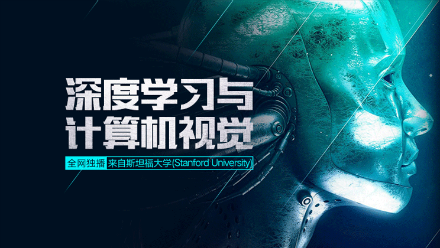

# ① 感知机和神经网络iris

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import numpy as np
from matplotlib import  pyplot as plt
from sklearn.neural_network import MLPClassifier

## 加载数据集

In [2]:
np.random.seed(0)
iris=datasets.load_iris() # 使用 scikit-learn  自带的 iris 数据集
X=iris.data[:,0:2] # 使用前两个特征，方便绘图
Y=iris.target # 标记值
data=np.hstack((X,Y.reshape(Y.size,1)))
np.random.shuffle(data) # 混洗数据。因为默认的iris 数据集：前50个数据是类别0，中间50个数据是类别1，末尾50个数据是类别2.混洗将打乱这个顺序
X=data[:,:-1]
Y=data[:,-1]
train_x=X[:-30]
test_x=X[-30:] # 最后30个样本作为测试集
train_y=Y[:-30]
test_y=Y[-30:]

# 绘制 MLPClassifier 的分类结果

In [3]:
def plot_classifier_predict_meshgrid(ax,clf,x_min,x_max,y_min,y_max):
      '''
     绘制 MLPClassifier 的分类结果

    :param ax:  Axes 实例，用于绘图
    :param clf: MLPClassifier 实例
    :param x_min: 第一维特征的最小值
    :param x_max: 第一维特征的最大值
    :param y_min: 第二维特征的最小值
    :param y_max: 第二维特征的最大值
    :return: None
      '''
      plot_step = 0.02 # 步长
      xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
          np.arange(y_min, y_max, plot_step))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      ax.contourf(xx, yy, Z, cmap=plt.cm.Paired) # 绘图

# 绘制二维数据集

In [4]:
def plot_samples(ax,x,y):
      '''
        绘制二维数据集

        :param ax:  Axes 实例，用于绘图
        :param x: 第一维特征
        :param y: 第二维特征
        :return: None
      '''
      n_classes = 3
      plot_colors = "bry" # 颜色数组。每个类别的样本使用一种颜色
      for i, color in zip(range(n_classes), plot_colors):
          idx = np.where(y == i)
          ax.scatter(x[idx, 0], x[idx, 1], c=color,
              label=iris.target_names[i], cmap=plt.cm.Paired) # 绘图

# 使用 MLPClassifier 预测调整后的 iris 数据集

In [5]:
def mlpclassifier_iris():
        '''
        使用 MLPClassifier 预测调整后的 iris 数据集

        :return: None
        '''
        fig=plt.figure(figsize=(8,10),dpi=80)
        ax=fig.add_subplot(1,1,1)
        classifier=MLPClassifier(activation='logistic',max_iter=10000,
            hidden_layer_sizes=(30,))
        classifier.fit(train_x,train_y)
        train_score=classifier.score(train_x,train_y)
        test_score=classifier.score(test_x,test_y)
        x_min, x_max = train_x[:, 0].min() - 1, train_x[:, 0].max() + 2
        y_min, y_max = train_x[:, 1].min() - 1, train_x[:, 1].max() + 2
        plot_classifier_predict_meshgrid(ax,classifier,x_min,x_max,y_min,y_max)
        plot_samples(ax,train_x,train_y)
        ax.legend(loc='best')
        ax.set_xlabel(iris.feature_names[0])
        ax.set_ylabel(iris.feature_names[1])
        ax.set_title("train score:%f;test score:%f"%(train_score,test_score))
        plt.show()

# 使用 MLPClassifier 预测调整后的 iris 数据集。考察不同的 hidden_layer_sizes 的影响

In [6]:
def mlpclassifier_iris_hidden_layer_sizes():
        '''
        使用 MLPClassifier 预测调整后的 iris 数据集。考察不同的 hidden_layer_sizes 的影响

        :return: None
        '''
        fig=plt.figure(figsize=(8,10),dpi=80)
        hidden_layer_sizes=[(10,),(30,),(100,),(5,5),(10,10),(30,30)] # 候选的 hidden_layer_sizes 参数值组成的数组
        for itx,size in enumerate(hidden_layer_sizes):
            ax=fig.add_subplot(2,3,itx+1)
            classifier=MLPClassifier(activation='logistic',max_iter=10000
                ,hidden_layer_sizes=size)
            classifier.fit(train_x,train_y)
            train_score=classifier.score(train_x,train_y)
            test_score=classifier.score(test_x,test_y)
            x_min, x_max = train_x[:, 0].min() - 1, train_x[:, 0].max() + 2
            y_min, y_max = train_x[:, 1].min() - 1, train_x[:, 1].max() + 2
            plot_classifier_predict_meshgrid(ax,classifier,x_min,x_max,y_min,y_max)
            plot_samples(ax,train_x,train_y)
            ax.legend(loc='best')
            ax.set_xlabel(iris.feature_names[0])
            ax.set_ylabel(iris.feature_names[1])
            ax.set_title("layer_size:%s;train score:%f;test score:%f"
                %(size,train_score,test_score))
        plt.show()


# 使用 MLPClassifier 预测调整后的 iris 数据集。考察不同的 activation 的影响

In [7]:
def mlpclassifier_iris_ativations():
        '''
        使用 MLPClassifier 预测调整后的 iris 数据集。考察不同的 activation 的影响

        :return:  None
        '''
        fig=plt.figure(figsize=(8,10),dpi=80)
        ativations=["logistic","tanh","relu"] # 候选的激活函数字符串组成的列表
        for itx,act in enumerate(ativations):
            ax=fig.add_subplot(1,3,itx+1)
            classifier=MLPClassifier(activation=act,max_iter=10000,
                hidden_layer_sizes=(30,))
            classifier.fit(train_x,train_y)
            train_score=classifier.score(train_x,train_y)
            test_score=classifier.score(test_x,test_y)
            x_min, x_max = train_x[:, 0].min() - 1, train_x[:, 0].max() + 2
            y_min, y_max = train_x[:, 1].min() - 1, train_x[:, 1].max() + 2
            plot_classifier_predict_meshgrid(ax,classifier,x_min,x_max,y_min,y_max)
            plot_samples(ax,train_x,train_y)
            ax.legend(loc='best')
            ax.set_xlabel(iris.feature_names[0])
            ax.set_ylabel(iris.feature_names[1])
            ax.set_title("activation:%s;train score:%f;test score:%f"
                %(act,train_score,test_score))
        plt.show()

# 使用 MLPClassifier 预测调整后的 iris 数据集。考察不同的 algorithm 的影响

In [8]:
def mlpclassifier_iris_algorithms():
        '''
        使用 MLPClassifier 预测调整后的 iris 数据集。考察不同的 algorithm 的影响

        :return: None
        '''
        fig=plt.figure(figsize=(8,10),dpi=80)
        algorithms=["l-bfgs","sgd","adam"] # 候选的算法字符串组成的列表
        for itx,algo in enumerate(algorithms):
            ax=fig.add_subplot(1,3,itx+1)
            classifier=MLPClassifier(activation="tanh",max_iter=10000,
                hidden_layer_sizes=(30,)#,algorithm=algo)
                )
            classifier.fit(train_x,train_y)
            train_score=classifier.score(train_x,train_y)
            test_score=classifier.score(test_x,test_y)
            x_min, x_max = train_x[:, 0].min() - 1, train_x[:, 0].max() + 2
            y_min, y_max = train_x[:, 1].min() - 1, train_x[:, 1].max() + 2
            plot_classifier_predict_meshgrid(ax,classifier,x_min,x_max,y_min,y_max)
            plot_samples(ax,train_x,train_y)
            ax.legend(loc='best')
            ax.set_xlabel(iris.feature_names[0])
            ax.set_ylabel(iris.feature_names[1])
            ax.set_title("algorithm:%s;train score:%f;test score:%f"%(algo,train_score,test_score))
        plt.show()

# 使用 MLPClassifier 预测调整后的 iris 数据集。考察不同的学习率的影响

In [10]:
def mlpclassifier_iris_eta():
        '''
        使用 MLPClassifier 预测调整后的 iris 数据集。考察不同的学习率的影响

        :return: None
        '''
        fig=plt.figure(figsize=(8,10),dpi=80)
        etas=[0.1,0.01,0.001,0.0001] # 候选的学习率值组成的列表
        for itx,eta in enumerate(etas):
            ax=fig.add_subplot(2,2,itx+1)
            classifier=MLPClassifier(activation="tanh",max_iter=1000000,
            hidden_layer_sizes=(30,),#algorithm='sgd',
            learning_rate_init=eta)
            classifier.fit(train_x,train_y)
            iter_num=classifier.n_iter_
            train_score=classifier.score(train_x,train_y)
            test_score=classifier.score(test_x,test_y)
            x_min, x_max = train_x[:, 0].min() - 1, train_x[:, 0].max() + 2
            y_min, y_max = train_x[:, 1].min() - 1, train_x[:, 1].max() + 2
            plot_classifier_predict_meshgrid(ax,classifier,x_min,x_max,y_min,y_max)
            plot_samples(ax,train_x,train_y)
            ax.legend(loc='best')
            ax.set_xlabel(iris.feature_names[0])
            ax.set_ylabel(iris.feature_names[1])
            ax.set_title("eta:%f;train score:%f;test score:%f;iter_num:%d"
                %(eta,train_score,test_score,iter_num))
        plt.show()

# 调用 mlpclassifier_iris

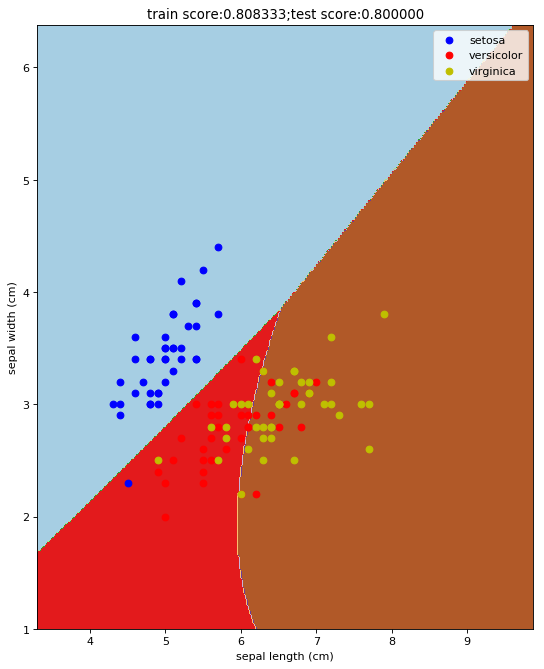

In [11]:
if __name__=='__main__':
    mlpclassifier_iris()     

# 调用 mlpclassifier_iris_hidden_layer_sizes

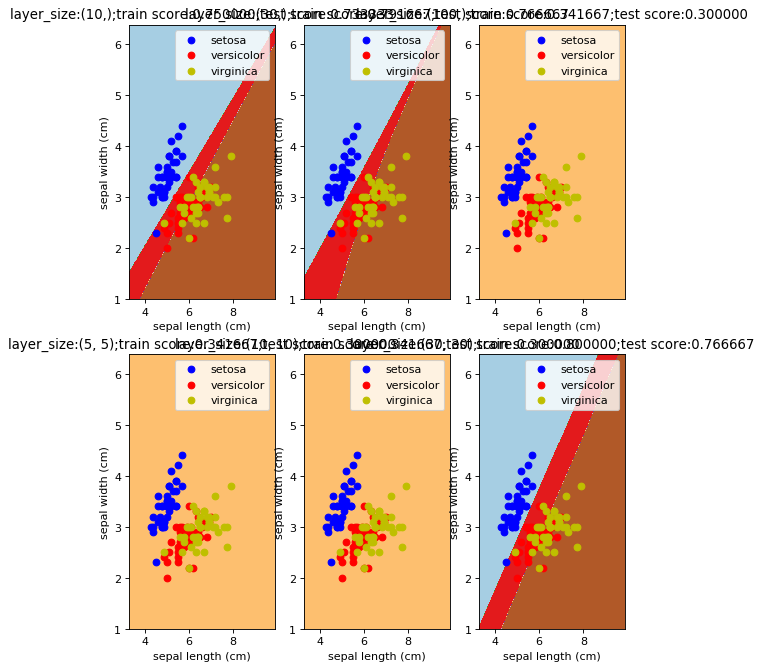

In [12]:
mlpclassifier_iris_hidden_layer_sizes()

# 调用 mlpclassifier_iris_ativations

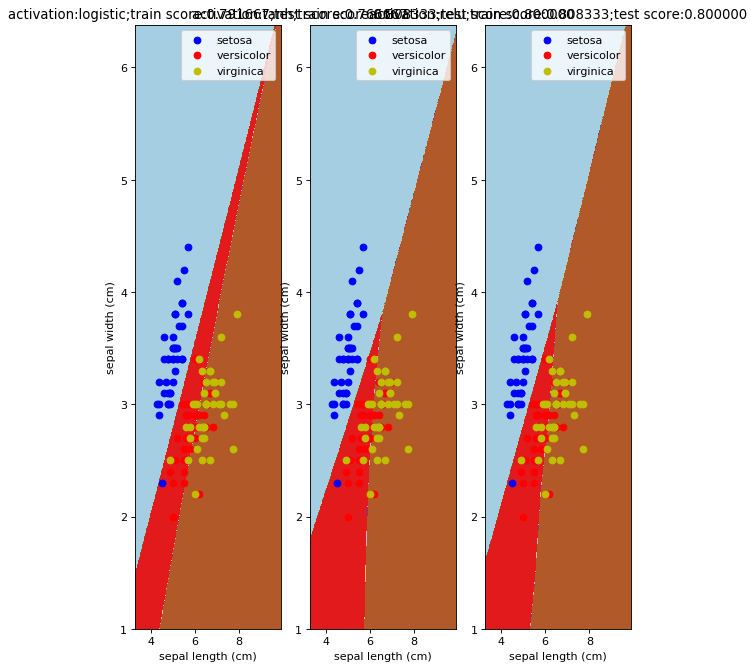

In [13]:
mlpclassifier_iris_ativations()

# 调用 mlpclassifier_iris_algorithms

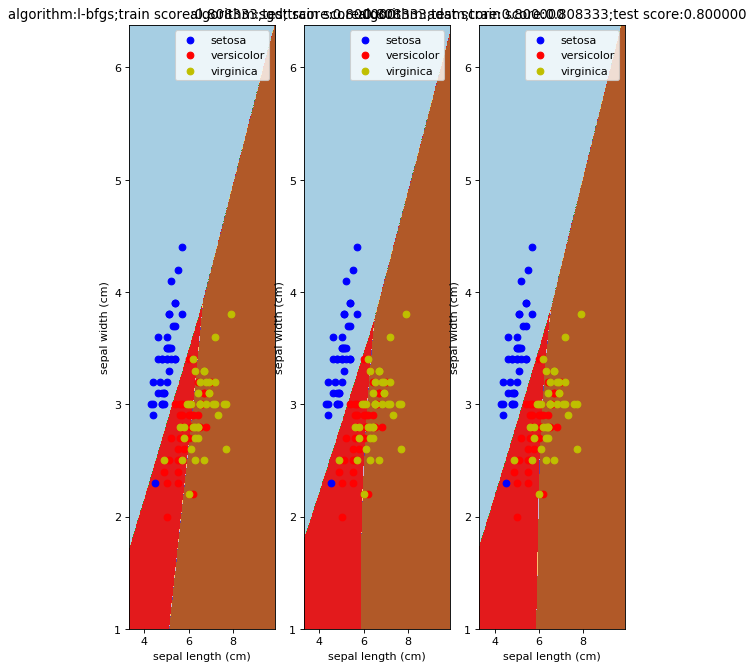

In [14]:
mlpclassifier_iris_algorithms()

# 调用 mlpclassifier_iris_eta

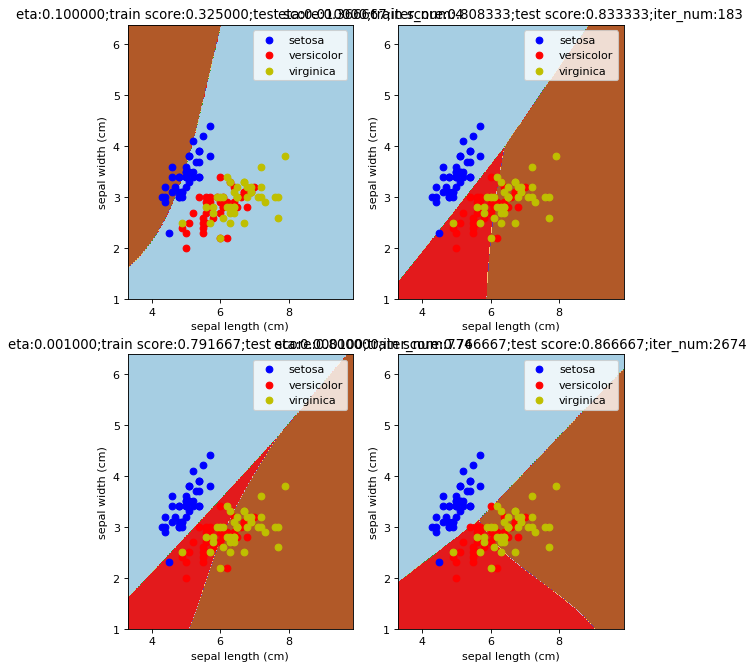

In [15]:
mlpclassifier_iris_eta()

# ② 感知机和神经网络

In [16]:
import numpy as np
from matplotlib import  pyplot as plt
from sklearn.neural_network import MLPClassifier

# 创建二维的线性不可分数据集

In [17]:
def creat_data_no_linear_2d(n):
        '''
        创建二维的线性不可分数据集

        :param n: 负例的数量
        :return: 线性不可分数据集，数据集大小为 2*n+n/10 （ n/10 是误差点的数量，误差点导致了线性不可分）
        '''
        np.random.seed(1)
        x_11=np.random.randint(0,100,(n,1)) #  第一组：第一维坐标值
        x_12=10+np.random.randint(-5,5,(n,1,))#  第一组：第二维坐标值
        x_21=np.random.randint(0,100,(n,1))#  第二组：第一维坐标值
        x_22=20+np.random.randint(0,10,(n,1))#  第二组：第二维坐标值

        x_31=np.random.randint(0,100,(int(n/10),1))#  第三组：第一维坐标值
        x_32=20+np.random.randint(0,10,(int(n/10),1))#  第三组：第二维坐标值

        new_x_11=x_11*np.sqrt(2)/2-x_12*np.sqrt(2)/2## 沿第一维轴旋转45度
        new_x_12=x_11*np.sqrt(2)/2+x_12*np.sqrt(2)/2## 沿第一维轴旋转45度
        new_x_21=x_21*np.sqrt(2)/2-x_22*np.sqrt(2)/2## 沿第一维轴旋转45度
        new_x_22=x_21*np.sqrt(2)/2+x_22*np.sqrt(2)/2## 沿第一维轴旋转45度
        new_x_31=x_31*np.sqrt(2)/2-x_32*np.sqrt(2)/2## 沿第一维轴旋转45度
        new_x_32=x_31*np.sqrt(2)/2+x_32*np.sqrt(2)/2## 沿第一维轴旋转45度

        plus_samples=np.hstack([new_x_11,new_x_12,np.ones((n,1))]) # 拼接成正例数据集
        minus_samples=np.hstack([new_x_21,new_x_22,-np.ones((n,1))])# 拼接成负例数据集
        err_samples=np.hstack([new_x_31,new_x_32,np.ones((int(n/10),1))])# 拼接成正例数据集，它导致了线性不可分
        samples=np.vstack([plus_samples,minus_samples,err_samples]) # 拼接成数据集
        np.random.shuffle(samples)  # 混洗数据
        return samples

# 绘制二维数据集

In [18]:
def plot_samples_2d(ax,samples):
            '''
            绘制二维数据集

            :param ax: Axes 实例，用于绘制图形
            :param samples: 二维数据集
            :return: None
            '''
            Y=samples[:,-1]
            position_p=Y==1 ## 正类位置
            position_m=Y==-1 ## 负类位置
            ax.scatter(samples[position_p,0],samples[position_p,1],
                marker='+',label='+',color='b')
            ax.scatter(samples[position_m,0],samples[position_m,1],
                marker='^',label='-',color='y')

# 绘制二维线性不可分数据集

In [24]:
def run_plot_samples_2d():
    '''
    绘制二维线性不可分数据集

    :return: None
    '''
    fig=plt.figure(figsize=(10,8),dpi=80)
    ax=fig.add_subplot(1,1,1)
    data=creat_data_no_linear_2d(100) # 生成二维线性不可分数据集
    plot_samples_2d(ax,data)
    ax.legend(loc='best')
    plt.show()

# 使用 MLPClassifier绘制预测结果

In [25]:
def predict_with_MLPClassifier(ax,train_data):
        '''
        使用 MLPClassifier绘制预测结果

        :param ax: Axes 实例，用于绘制图形
        :param train_data: 训练数据集
        :return: None
        '''
        train_x=train_data[:,:-1]
        train_y=train_data[:,-1]
        clf=MLPClassifier(activation='logistic',max_iter=1000)# 构造分类器实例
        clf.fit(train_x,train_y) # 训练分类器
        print(clf.score(train_x,train_y)) # 查看在训练集上的评价预测精度

        ## 用训练好的训练集预测平面上每一点的输出##
        x_min, x_max = train_x[:, 0].min() - 1, train_x[:, 0].max() + 2
        y_min, y_max = train_x[:, 1].min() - 1, train_x[:, 1].max() + 2
        plot_step=1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
            np.arange(y_min, y_max, plot_step))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)

# 用 MLPClassifier 预测线性不可分数据集

In [26]:
def run_predict_with_MLPClassifier():
    '''
    用 MLPClassifier 预测线性不可分数据集

    :return: None
    '''
    data=creat_data_no_linear_2d(500) #生成线性不可分数据集
    fig=plt.figure(figsize=(10,8),dpi=80)
    ax=fig.add_subplot(1,1,1)
    predict_with_MLPClassifier(ax,data)
    plot_samples_2d(ax,data)
    ax.legend(loc='best')
    plt.show()

# 调用 run_plot_samples_2d

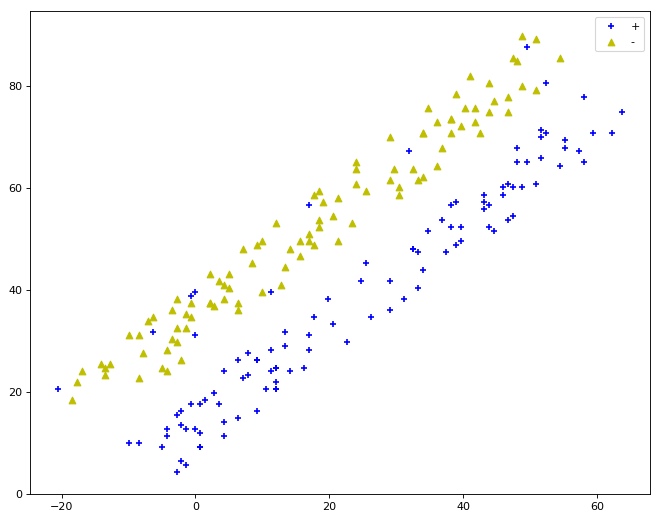

In [27]:
#%%
if __name__=='__main__':
    run_plot_samples_2d() 

# 调用 run_predict_with_MLPClassifier

0.952380952381


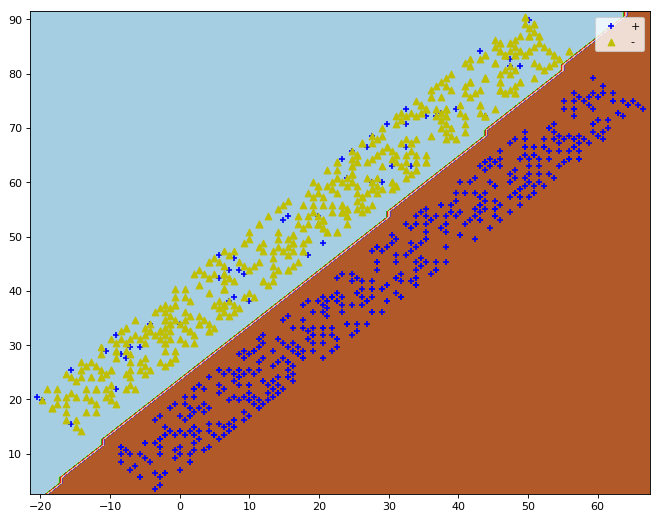

In [28]:
run_predict_with_MLPClassifier() 

# ③ 感知机和神经网络 感知机模型

In [29]:
from matplotlib import  pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# 创建线性可分数据集

In [30]:
def creat_data(n):
    '''
    创建线性可分数据集

    :param n: 正例样本的个数（同时也是负例样本的个数）
    :return: 返回一个线性可分数据集，数据集大小为 2*n
    '''
    np.random.seed(1)
    x_11=np.random.randint(0,100,(n,1)) # 第一组：第一维坐标值
    x_12=np.random.randint(0,100,(n,1,))# 第一组：第二维坐标值
    x_13=20+np.random.randint(0,10,(n,1,))#第一组： 第三维坐标值
    x_21=np.random.randint(0,100,(n,1)) # 第二组：第一维坐标值
    x_22=np.random.randint(0,100,(n,1)) # 第二组：第二维坐标值
    x_23=10-np.random.randint(0,10,(n,1,)) # 第二组：第三维坐标值

    new_x_12=x_12*np.sqrt(2)/2-x_13*np.sqrt(2)/2## 沿第一维轴旋转45度
    new_x_13=x_12*np.sqrt(2)/2+x_13*np.sqrt(2)/2## 沿第一维轴旋转45度
    new_x_22=x_22*np.sqrt(2)/2-x_23*np.sqrt(2)/2## 沿第一维轴旋转45度
    new_x_23=x_22*np.sqrt(2)/2+x_23*np.sqrt(2)/2## 沿第一维轴旋转45度

    plus_samples=np.hstack([x_11,new_x_12,new_x_13,np.ones((n,1))]) # 拼接成正例数据集
    minus_samples=np.hstack([x_21,new_x_22,new_x_23,-np.ones((n,1))]) # 拼接成负例数据集
    samples=np.vstack([plus_samples,minus_samples]) # 拼接成完整数据集
    np.random.shuffle(samples)  # 混洗数据
    return samples

# 创建线性不可分数据集

In [31]:
def creat_data_no_linear(n):
    '''
    创建线性不可分数据集

    :param n: 正例样本的个数（同时也是负例样本的个数）
    :return: 返回一个线性不可分数据集，数据集大小为 2*n
    '''
    np.random.seed(1)
    x_11=np.random.randint(0,100,(n,1))# 第一组：第一维坐标值
    x_12=np.random.randint(0,100,(n,1,))# 第一组：第二维坐标值
    x_13=10+np.random.randint(0,10,(n,1,))#第一组： 第三维坐标值
    x_21=np.random.randint(0,100,(n,1))# 第二组：第一维坐标值
    x_22=np.random.randint(0,100,(n,1))# 第二组：第二维坐标值
    x_23=20-np.random.randint(0,10,(n,1,)) # 第二组：第三维坐标值

    new_x_12=x_12*np.sqrt(2)/2-x_13*np.sqrt(2)/2## 沿第一维轴旋转45度
    new_x_13=x_12*np.sqrt(2)/2+x_13*np.sqrt(2)/2## 沿第一维轴旋转45度
    new_x_22=x_22*np.sqrt(2)/2-x_23*np.sqrt(2)/2## 沿第一维轴旋转45度
    new_x_23=x_22*np.sqrt(2)/2+x_23*np.sqrt(2)/2## 沿第一维轴旋转45度

    plus_samples=np.hstack([x_11,new_x_12,new_x_13,np.ones((n,1))])# 拼接成正例数据集
    minus_samples=np.hstack([x_21,new_x_22,new_x_23,-np.ones((n,1))])# 拼接成负例数据集
    samples=np.vstack([plus_samples,minus_samples])# 拼接成完整数据集
    np.random.shuffle(samples)  # 混洗数据
    return samples

# 绘制样本点

In [32]:
def plot_samples(ax,samples):
    '''
    绘制样本点

    :param ax: 绘制图形所在的 Axes
    :param samples: 样本数据集
    :return: None
    '''
    Y=samples[:,-1] # 标记信息
    position_p=Y==1 ## 正类位置
    position_m=Y==-1 ## 负类位置
    ax.scatter(samples[position_p,0],samples[position_p,1],
        samples[position_p,2],marker='+',label='+',color='b') # 绘制正类样本点
    ax.scatter(samples[position_m,0],samples[position_m,1],
        samples[position_m,2],marker='^',label='-',color='y') # 绘制负类样本点

# 绘制线性可分数据集

In [33]:
def run_plot_samples():
    '''
    绘制线性可分数据集

    :return: None
    '''
    fig=plt.figure(figsize=(10,8),dpi=80)
    ax=Axes3D(fig)
    data=creat_data(100) # 产生线性可分数据集
    plot_samples(ax,data)
    ax.legend(loc='best')
    plt.show()

# 绘制线性不可分数据集

In [34]:
def run_plot_samples_no_linear():
    '''
    绘制线性不可分数据集

    :return: None
    '''
    data=creat_data_no_linear(100)# 产生线性不可分数据集
    fig=plt.figure(figsize=(8,10),dpi=80)
    ax=Axes3D(fig)
    plot_samples(ax,data)
    ax.legend(loc='best')
    plt.show()

# 感知机的原始算法

In [35]:
def perceptron(train_data,eta,w_0,b_0):
     '''
    感知机的原始算法

    :param train_data: 训练数据集
    :param eta: 学习率
    :param w_0: 初始权重向量
    :param b_0: 初始的 b
    :return: 一个元组，依次为：最终的权重向量，最终的 b 值，迭代次数
     '''
     x=train_data[:,:-1]  # x 数据
     y=train_data[:,-1]  #  对应的标记
     length= train_data.shape[0] #样本集大小
     w=w_0
     b=b_0
     step_num=0
     while True:
        i=0
        while(i< length): ## 遍历一轮样本集中的所有的样本点
            step_num+=1
            '''
          当应用于线性不可分数据集时，用下面4行代替上面的 step_num+=1 这一行。如果不这么做，那么当用于线性
          不可分数据集时，迭代永远不会停止。
            step_num+=1
            if step_num>=10000000:
                print("failed!,step_num =%d"%step_num)
                return
          '''
            x_i=x[i].reshape((x.shape[1],1)) # 变成列向量，因为需要执行 np.dot 函数
            y_i=y[i]
            if y_i*(np.dot(np.transpose(w),x_i)+b) <=0: # 该点是误分类点
                w=w+eta*y_i*x_i  # 梯度下降
                b=b+eta*y_i      # 梯度下降
                break # 执行下一轮筛选
            else:#该点不是误分类点，选取下一个样本点
                i=i+1
        if(i== length): #没有误分类点，结束循环
            break
     return (w,b,step_num)

# 创建分离超平面

In [36]:
def creat_hyperplane(x,y,w,b):
    '''
    创建分离超平面

    :param x: 分离超平面上的点的x坐标组成的数组
    :param y: 分离超平面上的点的y坐标组成的数组
    :param w: 超平面的法向量，它是一个列向量
    :param b: 超平面的截距
    :return: 分离超平面上的点的z坐标组成的数组
    '''
    return (-w[0][0]*x-w[1][0]*y-b)/w[2][0] # w0*x+w1*y+w2*z+b=0

# 对线性可分数据集执行感知机的原始算法并绘制分离超平面

In [37]:
def run_perceptron():
    '''
    对线性可分数据集执行感知机的原始算法并绘制分离超平面

    :return: None
    '''
    data=creat_data(100) #产生线性可分数据集
    eta,w_0,b_0=0.1,np.ones((3,1),dtype=float),1 # 初始化 学习率、权重、 b
    w,b,num=perceptron(data,eta,w_0,b_0) # 执行感知机的原始形式
    ### 绘图
    fig=plt.figure(figsize=(8,10),dpi=80)
    plt.suptitle("perceptron")
    ax=Axes3D(fig)

    ### 绘制样本点
    plot_samples(ax,data)

    ##  绘制分离超平面
    x=np.linspace(-30,100,100)  # 分离超平面的 x坐标数组
    y=np.linspace(-30,100,100) # 分离超平面的 y坐标数组
    x,y=np.meshgrid(x,y) # 划分网格
    z=creat_hyperplane(x,y,w,b)  # 分离超平面的 z坐标数组
    ax.plot_surface(x, y, z, rstride=1, cstride=1,color='g',alpha=0.2)

    ax.legend(loc="best")
    plt.show()

# 对线性不可分数据集执行感知机的元素算法

In [38]:
def run_perceptron_no_linear():
    '''
    对线性不可分数据集执行感知机的元素算法

    :return: None
    '''
    data=creat_data_no_linear(100)#产生线性不可分数据集
    perceptron(data,eta=0.1,w_0=np.zeros((2,1)),b_0=0)

# 根据训练数据集和 alpha向量 创建 权重向量

In [39]:
def creat_w(train_data,alpha):
    '''
    根据训练数据集和 alpha向量 创建 权重向量

    :param train_data: 训练数据集
    :param alpha: alpha 向量
    :return: 权重向量
    '''
    x=train_data[:,:-1]  # x 数据
    y=train_data[:,-1]  #  对应的分类
    N= train_data.shape[0] #样本集大小
    w=np.zeros((x.shape[1],1))
    for i in range(0,N):
        w=w+alpha[i][0]*y[i]*(x[i].reshape(x[i].size,1))
    return w

# 感知机的对偶形式算法

In [40]:
def perceptron_dual(train_data,eta,alpha_0,b_0):
    '''
    感知机的对偶形式算法

    :param train_data: 训练数据集
    :param eta: 学习率
    :param alpha_0: 初始的 alpha 向量
    :param b_0: 初始的 b 值
    :return: 一个元组，依次为：最终的alpha 向量、最终的 b 值、迭代次数
    '''
    x=train_data[:,:-1]  # x 数据
    y=train_data[:,-1]  #  对应的分类
    length= train_data.shape[0] #样本集大小
    alpha=alpha_0
    b=b_0
    step_num=0
    while True:
        i=0
        while(i< length):
            step_num+=1
            x_i=x[i].reshape((x.shape[1],1)) # 变形为列向量，因为需要调用 np.dot
            y_i=y[i]
            w=creat_w(train_data,alpha)
            z=y_i*(np.dot(np.transpose(w),x_i)+b)
            if z <=0: # 该点是误分类点
                alpha[i][0]+=eta  # 梯度下降
                b+=eta*y_i  # 梯度下降
                break # 梯度下降了，从头开始，执行下一轮筛选
            else:
                i=i+1 #该点不是误分类点，选取下一个样本点
        if(i== length ): #没有误分类点，结束循环
            break
    return (alpha,b,step_num)

# 对线性可分数据集执行感知机的原始算法和对偶形式算法，并绘制分离超平面

In [41]:
def run_perceptron_dual():
    '''
    对线性可分数据集执行感知机的原始算法和对偶形式算法，并绘制分离超平面

    :return: None
    '''
    data=creat_data(100)
    eta,w_0,b_0=0.1,np.ones((3,1),dtype=float),1
    w_1,b_1,num_1=perceptron(data,eta,w_0,b_0) ##执行原始形式的算法
    alpha,b_2,num_2=perceptron_dual(data,eta=0.1,alpha_0=np.zeros((data.shape[0]*2,1)),
        b_0=0) # 执行对偶形式的算法
    w_2=creat_w(data,alpha)

    print("w_1,b_1",w_1,b_1)
    print("w_2,b_2",w_2,b_2)

    ## 绘图
    fig=plt.figure(figsize=(8,10),dpi=80)
    plt.suptitle("perceptron")
    ax=Axes3D(fig)

    ### 绘制样本点
    plot_samples(ax,data)

    ##  绘制分离超平面
    x=np.linspace(-30,100,100)  # 分离超平面的 x坐标数组
    y=np.linspace(-30,100,100) # 分离超平面的 y坐标数组
    x,y=np.meshgrid(x,y) # 划分网格
    z=creat_hyperplane(x,y,w_1,b_1)  # 原始形式算法的分离超平面的 z坐标数组
    z_2=creat_hyperplane(x,y,w_2,b_2)  # 对偶形式算法的分离超平面的 z坐标数组
    ax.plot_surface(x, y, z, rstride=1, cstride=1,color='g',alpha=0.2)
    ax.plot_surface(x, y, z_2, rstride=1, cstride=1,color='c',alpha=0.2)
    ax.legend(loc="best")
    plt.show()

# 测试学习率对于感知机两种形式算法的收敛速度的影响

In [42]:
def test_eta(data,ax,etas,w_0,alpha_0,b_0):
        '''
        测试学习率对于感知机两种形式算法的收敛速度的影响

        :param data:  训练数据集
        :param ax: Axes实例，负责绘制图形
        :param etas: 候选的学习率的值组成的列表
        :param w_0: 原始算法用到的初始权重向量
        :param alpha_0: 对偶形式用到的初始 alpha 向量
        :param b_0: 初始 b 值
        :return: None
        '''
        nums1=[]
        nums2=[]
        for eta in etas:
            _,_,num_1=perceptron(data,eta,w_0=w_0,b_0=b_0) # 获取原始形式算法的迭代次数
            _,_,num_2=perceptron_dual(data,eta=0.1,alpha_0=alpha_0,b_0=b_0) # 获取对偶形式算法的迭代次数
            nums1.append(num_1)
            nums2.append(num_2)
        ax.plot(etas,np.array(nums1),label='orignal iteraton times')
        ax.plot(etas,np.array(nums2),label='dual iteraton times')

# 执行 test_eta

In [43]:
def run_test_eta():
    '''
    执行 test_eta

    :return: None
    '''
    fig=plt.figure(figsize=(8,10),dpi=80)
    fig.suptitle("perceptron")
    ax=fig.add_subplot(1,1,1)
    ax.set_xlabel(r'$\eta$')

    data=creat_data(20) # 创建线性可分数据集
    etas=np.linspace(0.01,1,num=25,endpoint=False)
    w_0,b_0,alpha_0=np.ones((3,1)),0,np.zeros((data.shape[0],1))
    test_eta(data,ax,etas,w_0,alpha_0,b_0)

    ax.legend(loc="best",framealpha=0.5)
    plt.show()

# 执行 run_plot_samples

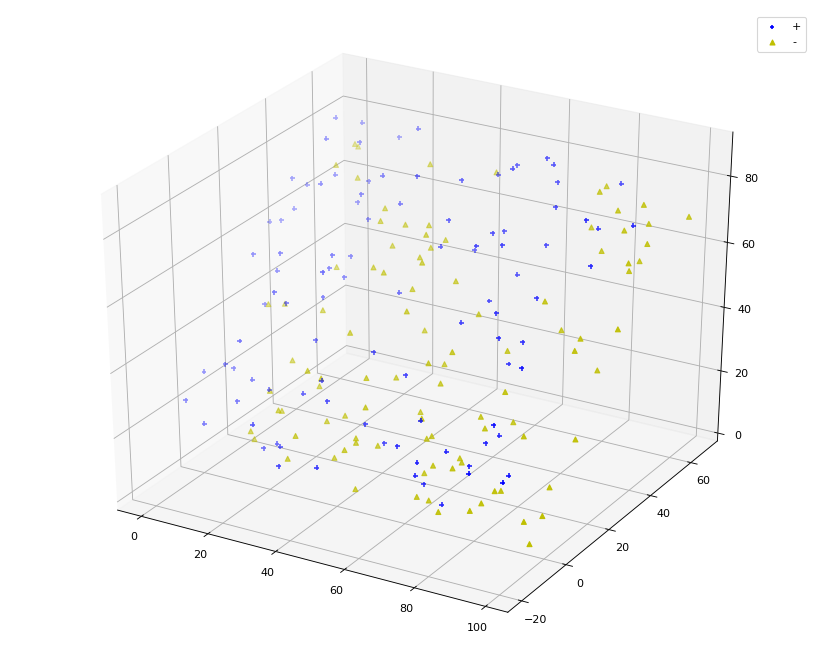

In [44]:
if __name__=='__main__':
    run_plot_samples() 

# 执行 run_perceptron

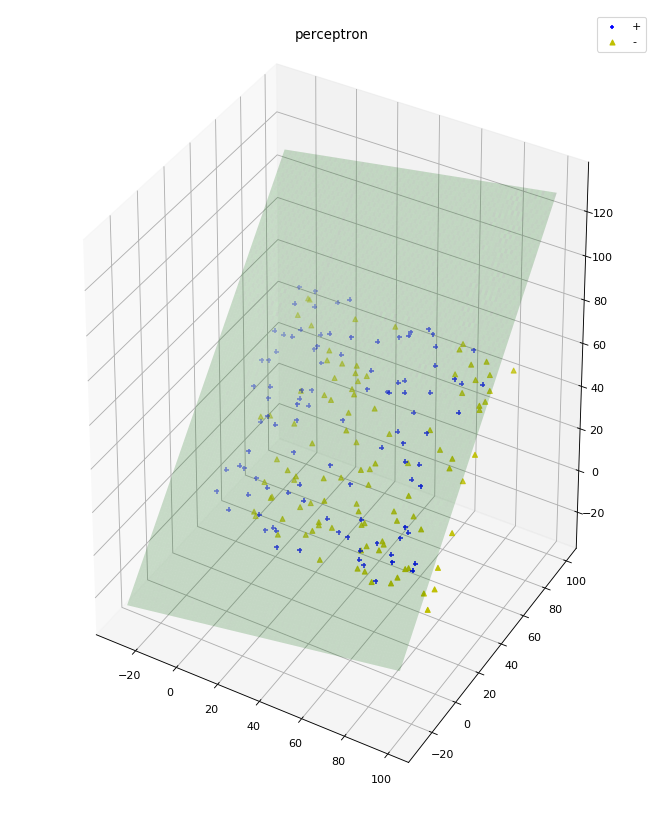

In [45]:
run_perceptron()

# 执行 run_perceptron_dual

w_1,b_1 [[-10.1       ]
 [-68.08433252]
 [ 64.85174234]] -651.4
w_2,b_2 [[-10.1       ]
 [-67.17514421]
 [ 64.06387437]] -641.9


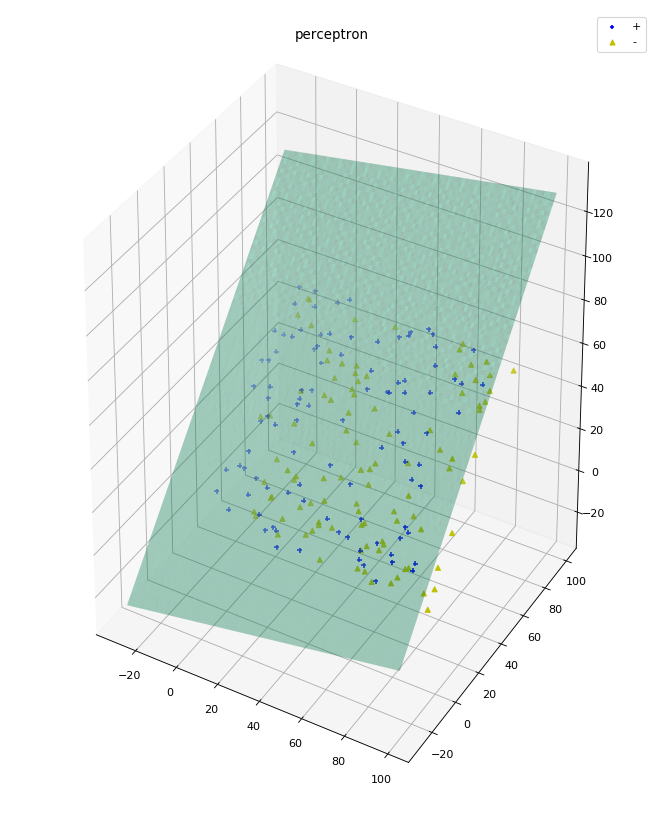

In [47]:
run_perceptron_dual()

# 执行 run_test_eta

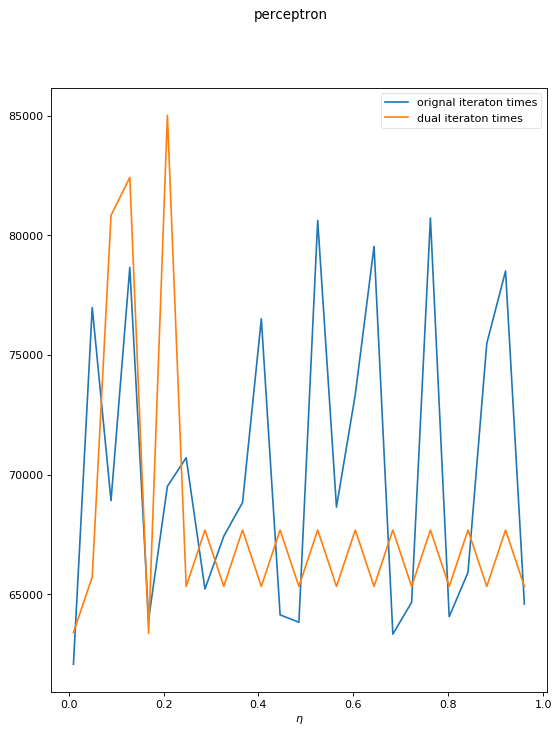

In [51]:
run_test_eta()

# 执行 run_plot_samples_no_linear

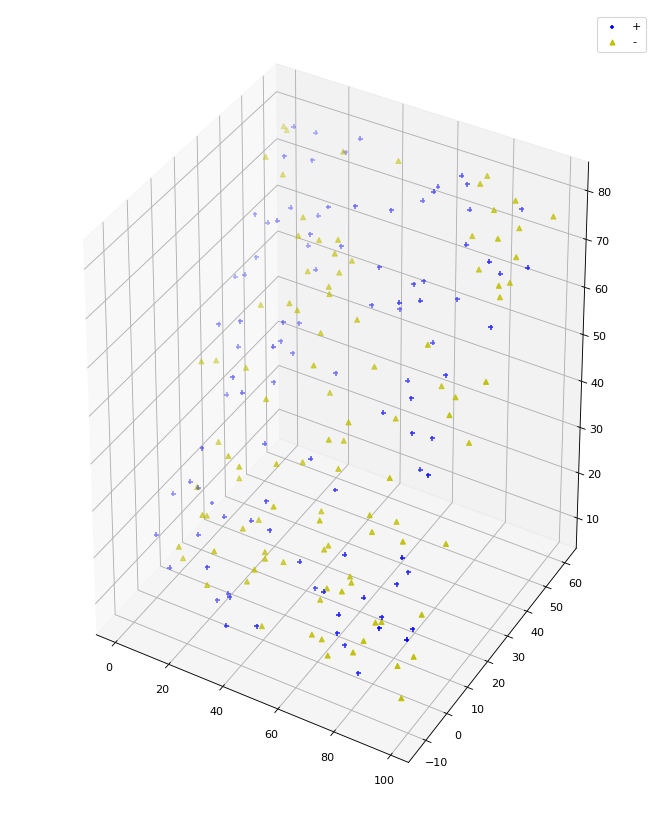

In [52]:
run_plot_samples_no_linear()

# 执行 run_perceptron_no_linear运行错误

In [ ]:
run_perceptron_no_linear()